In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
airlines=pd.read_excel('Airlines+Data.xlsx')

In [3]:
airlines.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
Month         96 non-null datetime64[ns]
Passengers    96 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [174]:
airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


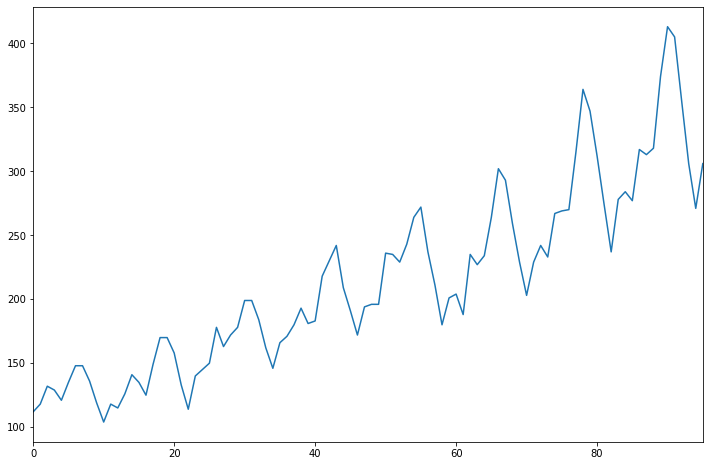

In [105]:
airlines.Passengers.plot() #linear trend multiplicative seasonality

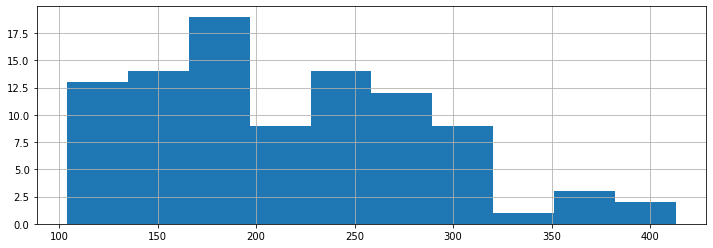

In [106]:
airlines['Passengers'].hist(figsize=(12,4))

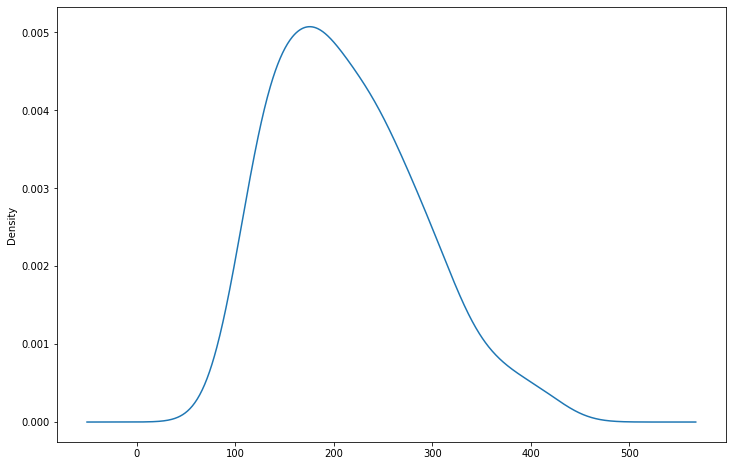

In [107]:
airlines.Passengers.plot(kind='kde')
plt.show()   #density plot

In [108]:
#fig = plt.subplots(figsize=(12,2))
#ax = sns.boxplot(airlines['Passengers'], whis=1)

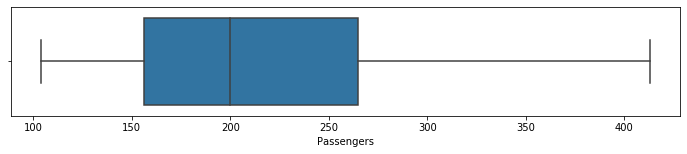

In [109]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(airlines['Passengers'], whis=1.5)

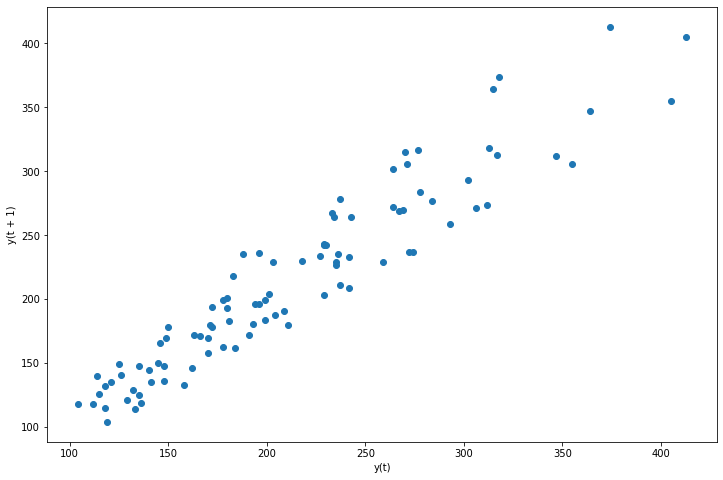

In [110]:
from pandas.plotting import lag_plot
lag_plot(airlines['Passengers'])
plt.show()

In [5]:
airlines['Date']=pd.to_datetime(airlines.Month,format="%b-%y")
airlines["Month"]=airlines.Date.dt.strftime("%b")
airlines["year"]=airlines.Date.dt.strftime("%Y")

In [6]:
airlines.head()

,Month,Passengers,Date,year
0,Jan,112,1995-01-01,1995
1,Feb,118,1995-02-01,1995
2,Mar,132,1995-03-01,1995
3,Apr,129,1995-04-01,1995
4,May,121,1995-05-01,1995


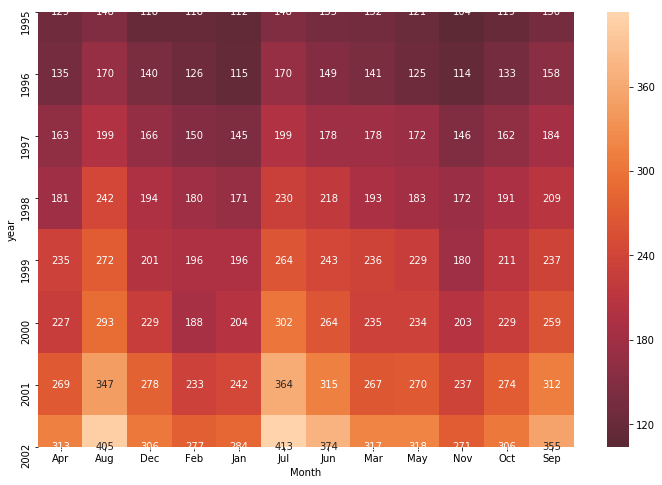

In [31]:
plt.figure(figsize=(12,8))
heatmap_y_month=pd.pivot_table(data=airlines,values='Passengers',index='year',columns='Month',aggfunc='mean',fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g",center=0)

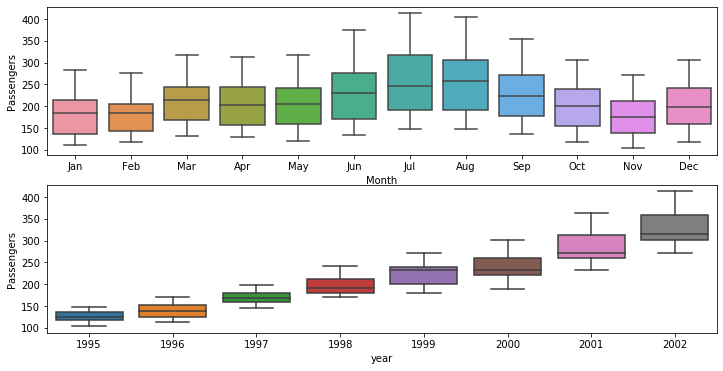

In [177]:
plt.figure(figsize=(12,6))
plt.subplot(211)
sns.boxplot(x='Month',y='Passengers',data=airlines)
plt.subplot(212)
sns.boxplot(x='year',y='Passengers',data=airlines)
plt.show()

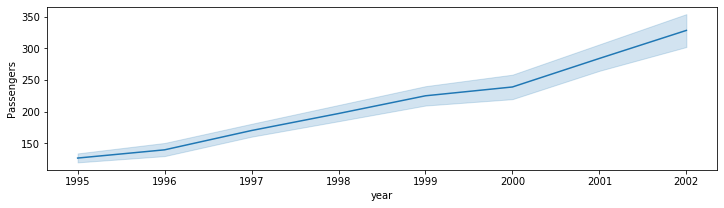

In [178]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=airlines)

In [179]:
airlines.head(10)

,Month,Passengers,Date,year
0,Jan,112,1995-01-01,1995
1,Feb,118,1995-02-01,1995
2,Mar,132,1995-03-01,1995
3,Apr,129,1995-04-01,1995
4,May,121,1995-05-01,1995
5,Jun,135,1995-06-01,1995
6,Jul,148,1995-07-01,1995
7,Aug,148,1995-08-01,1995
8,Sep,136,1995-09-01,1995
9,Oct,119,1995-10-01,1995


In [7]:
airlines=airlines.drop(['Month'],axis=1)

In [8]:
airlines=airlines.drop(['year'],axis=1)

In [9]:
airlines.head()

,Passengers,Date
0,112,1995-01-01
1,118,1995-02-01
2,132,1995-03-01
3,129,1995-04-01
4,121,1995-05-01


In [10]:
airlines['Date']=pd.to_datetime(airlines['Date'])
airlines.set_index('Date',inplace=True)

In [11]:
#splitting data

In [12]:
train=airlines.head(84)
test=airlines.tail(12)

In [13]:
train.head()

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


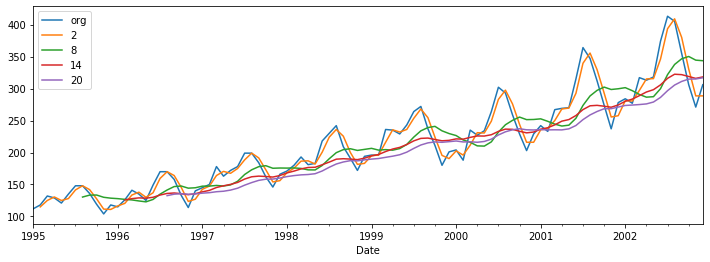

In [14]:
#moving average
plt.figure(figsize=(12,4))
airlines.Passengers.plot(label='org')
for i in range(2,24,6):
    airlines['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

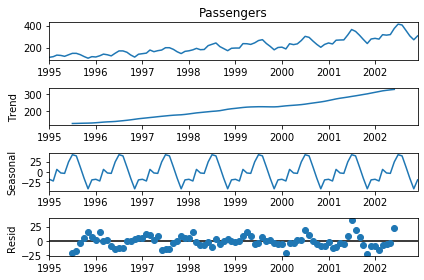

In [20]:
#decompostion plot
decompose=seasonal_decompose(airlines.Passengers)
decompose.plot()
plt.show()

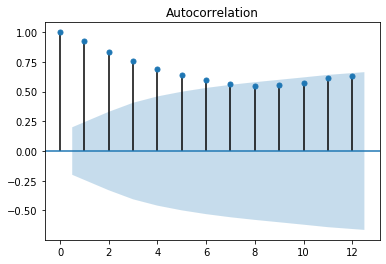

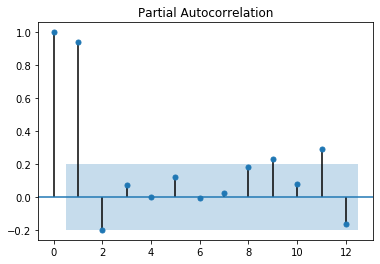

In [21]:
#ACF and PACF plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airlines.Passengers,lags=12)
tsa_plots.plot_pacf(airlines.Passengers,lags=12)
plt.show()

In [22]:
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

In [23]:
ses_model=SimpleExpSmoothing(train['Passengers']).fit(smoothing_level=0.2)
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_ses,test.Passengers)

13.411274740513823

In [24]:
#holt method
hw_model=Holt(train['Passengers']).fit(smoothing_level=0.2)
pred_hw=hw_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hw,test.Passengers)

10.690816697186712

In [25]:
hw_model_add_add=ExponentialSmoothing(train['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hw_add_add=hw_model_add_add.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hw_add_add,test.Passengers)

5.502796732509128

In [26]:
hw_model_mul_add=ExponentialSmoothing(train['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hw_mul_add=hw_model_mul_add.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hw_mul_add,test.Passengers)

2.8210270726256326

In [27]:
hw_model_mul_add=ExponentialSmoothing(airlines['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [28]:
hw_model_mul_add.forecast(10)

2003-01-01    312.899768
2003-02-01    308.171843
2003-03-01    355.533483
2003-04-01    345.770653
2003-05-01    345.697050
2003-06-01    392.471899
2003-07-01    436.502735
2003-08-01    429.860677
2003-09-01    380.174322
2003-10-01    332.318746
Freq: MS, dtype: float64

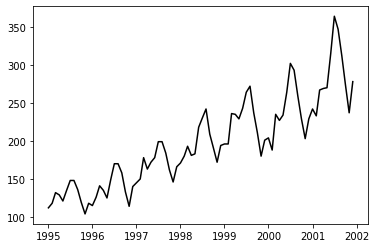

In [30]:
plt.plot(train.index, train["Passengers"], label='train',color="black")

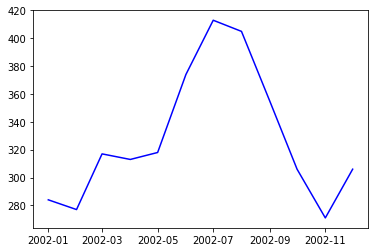

In [32]:
plt.plot(test.index, test["Passengers"], label='test',color="blue")

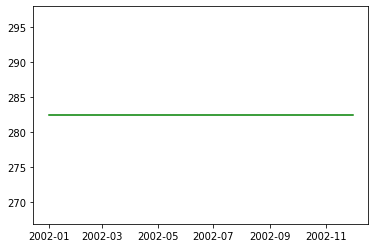

In [33]:
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")

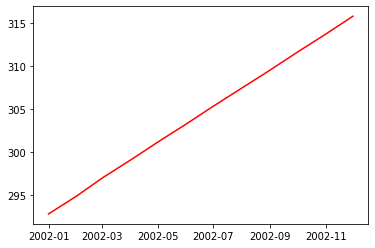

In [34]:
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")

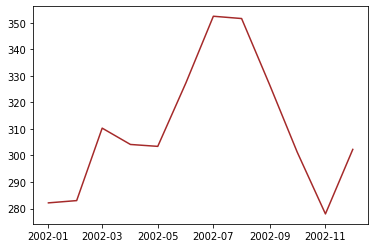

In [37]:
plt.plot(pred_hw_add_add.index,pred_hw_add_add,label="HoltsWinterExponential_1",color="brown")

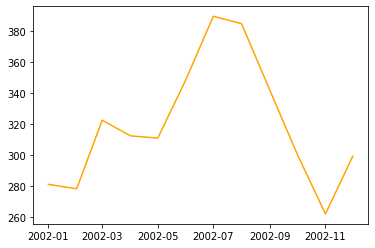

In [40]:
plt.plot(pred_hw_mul_add.index,pred_hw_mul_add,label="HoltsWinterExponential_2",color="orange")